In [1]:
import pandas as pd
import numpy as np
import keras
import torch
import tensorflow
import zipfile
import matplotlib.pyplot as plt
# import matplotlib.image as mimg
from skimage.io import imread

import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2
from tqdm import tqdm

In [27]:
# ziploc = "/home/jensruhof/Documents/UU/PatRec/CXR_project/"
# imgloc = "/home/jensruhof/.darwin/datasets/v7-labs/covid-19-chest-x-ray-dataset/images/"
ziploc ="E:/School/UU/PATREC/CXR_project/"
imgLoc = "E:/School/UU\PATREC/.darwin/datasets/v7-labs/covid-19-chest-x-ray-dataset/images/"
zf= zipfile.ZipFile(ziploc+'clean_data.zip') 
df = pd.read_csv(zf.open('clean_data.csv'))

In [28]:
df[20:40]

,filename,type,ogfilename,lung1,lung2,view,Covid,width,height,json_filename
20,00006510.png,Undefined Pneumonia,000002-4.png,"{'path': [{'x': 281, 'y': 124}, {'x': 279, 'y'...","{'path': [{'x': 203.0, 'y': 90}, {'x': 202.0, ...",View/AP_Supine,False,586.0,492.0,000002-4.json
21,00006511.png,Viral Pneumonia,000002-7.png,NaN,NaN,View/Lateral,False,675.0,767.0,000002-7.json
22,00006526.png,Undefined Pneumonia,000003-4.png,"{'path': [{'x': 301, 'y': 84}, {'x': 299, 'y':...","{'path': [{'x': 214, 'y': 68}, {'x': 211, 'y':...",View/AP_Supine,False,503.0,492.0,000003-4.json
23,00006532.png,Undefined Pneumonia,000004-3.png,"{'path': [{'x': 267.0, 'y': 61}, {'x': 267.0, ...","{'path': [{'x': 179, 'y': 62}, {'x': 171, 'y':...",View/AP_Supine,False,585.0,492.0,000004-3.json
24,00006540.png,Viral Pneumonia,000005-3.png,"{'path': [{'x': 359.0, 'y': 101}, {'x': 357, '...","{'path': [{'x': 260, 'y': 93.0}, {'x': 259.0, ...",View/AP,False,724.0,595.0,000005-3.json
25,00006541.jpg,NaN,000005-5-a.jpg,"{'path': [{'x': 250.0, 'y': 0}, {'x': 249.0, '...","{'path': [{'x': 155, 'y': 0}, {'x': 125, 'y': ...",View/PA,False,381.0,328.0,000005-5-a.json
26,00006542.jpg,NaN,000005-5-b.jpg,NaN,NaN,View/Lateral,False,325.0,328.0,000005-5-b.json
27,00006549.jpg,Bacterial Pneumonia,000006-12.jpg,"{'path': [{'x': 276.0, 'y': 81}, {'x': 264, 'y...","{'path': [{'x': 427, 'y': 62}, {'x': 427, 'y':...",View/PA,False,744.0,744.0,000006-12.json
28,00006550.jpg,Undefined Pneumonia,000006-17.jpg,"{'path': [{'x': 245, 'y': 22.0}, {'x': 243, 'y...","{'path': [{'x': 354.0, 'y': 19}, {'x': 352.0, ...",View/PA,False,597.0,531.0,000006-17.json
29,00006548.png,Viral Pneumonia,000006-2.png,"{'path': [{'x': 332.0, 'y': 105}, {'x': 331.0,...","{'path': [{'x': 429.0, 'y': 116.0}, {'x': 427,...",View/PA,False,726.0,723.0,000006-2.json


In [29]:
# Before splitting we made sure that every filename appears only once, so no double data. This is a naive split not 
# Looking at the distribution of covid cases, view and type.
train, test = train_test_split(df, test_size=0.2)

In [30]:
train

,filename,type,ogfilename,lung1,lung2,view,Covid,width,height,json_filename
3001,00004211.jpeg,Bacterial Pneumonia,person1351_bacteria_3441.jpeg,"{'path': [{'x': 448, 'y': 57}, {'x': 447, 'y':...","{'path': [{'x': 648.0, 'y': 83}, {'x': 646.0, ...",NaN,False,1112.0,680.0,person1351_bacteria_3441.json
1279,00005903.jpeg,No Pneumonia,NORMAL2-IM-0123-0001.jpeg,"{'path': [{'x': 1129, 'y': 333.0}, {'x': 1129,...","{'path': [{'x': 874.0, 'y': 369}, {'x': 873, '...",NaN,False,2043.0,1217.0,NORMAL2-IM-0123-0001.json
3179,00001202.jpeg,Viral Pneumonia,person141_virus_287.jpeg,"{'path': [{'x': 671.0, 'y': 77}, {'x': 664, 'y...","{'path': [{'x': 937, 'y': 63.0}, {'x': 937, 'y...",NaN,False,1608.0,1168.0,person141_virus_287.json
3263,00001121.jpeg,Viral Pneumonia,person1455_virus_2488.jpeg,"{'path': [{'x': 338, 'y': 134}, {'x': 336, 'y'...","{'path': [{'x': 458, 'y': 129}, {'x': 458, 'y'...",NaN,False,904.0,608.0,person1455_virus_2488.json
4915,00002795.jpeg,Bacterial Pneumonia,person43_bacteria_213.jpeg,"{'path': [{'x': 524, 'y': 106}, {'x': 523, 'y'...","{'path': [{'x': 692, 'y': 83}, {'x': 692, 'y':...",NaN,False,1216.0,736.0,person43_bacteria_213.json
...,...,...,...,...,...,...,...,...,...,...
783,00005636.jpeg,No Pneumonia,IM-0362-0001.jpeg,"{'path': [{'x': 918, 'y': 270}, {'x': 918, 'y'...","{'path': [{'x': 681, 'y': 254.0}, {'x': 678, '...",NaN,False,1582.0,1183.0,IM-0362-0001.json
1739,00004885.jpeg,No Pneumonia,NORMAL2-IM-0869-0001.jpeg,"{'path': [{'x': 951, 'y': 264}, {'x': 950.0, '...","{'path': [{'x': 697, 'y': 243}, {'x': 695, 'y'...",NaN,False,1534.0,1063.0,NORMAL2-IM-0869-0001.json
3174,00006224.jpeg,Bacterial Pneumonia,person141_bacteria_670.jpeg,"{'path': [{'x': 423, 'y': 28}, {'x': 422, 'y':...","{'path': [{'x': 535, 'y': 51}, {'x': 535, 'y':...",NaN,False,944.0,536.0,person141_bacteria_670.json
4383,00003150.jpeg,Bacterial Pneumonia,person30_bacteria_151.jpeg,"{'path': [{'x': 361, 'y': 74}, {'x': 359, 'y':...","{'path': [{'x': 533, 'y': 81}, {'x': 527, 'y':...",NaN,False,952.0,616.0,person30_bacteria_151.json


In [31]:
test

,filename,type,ogfilename,lung1,lung2,view,Covid,width,height,json_filename
3623,00003857.jpeg,Bacterial Pneumonia,person1597_bacteria_4194.jpeg,"{'path': [{'x': 1077, 'y': 298}, {'x': 1077, '...","{'path': [{'x': 711.0, 'y': 270}, {'x': 707.0,...",NaN,False,1768.0,1560.0,person1597_bacteria_4194.json
4359,00000972.jpeg,Viral Pneumonia,person304_virus_625.jpeg,"{'path': [{'x': 412, 'y': 102}, {'x': 410, 'y'...","{'path': [{'x': 640, 'y': 97}, {'x': 640, 'y':...",NaN,False,1048.0,768.0,person304_virus_625.json
2683,00001462.jpeg,Viral Pneumonia,person1238_virus_2098.jpeg,"{'path': [{'x': 464, 'y': 20.0}, {'x': 462.0, ...","{'path': [{'x': 680, 'y': 34.0}, {'x': 680, 'y...",NaN,False,1168.0,608.0,person1238_virus_2098.json
4949,00002904.jpeg,Bacterial Pneumonia,person443_bacteria_1924.jpeg,"{'path': [{'x': 578, 'y': 191}, {'x': 574, 'y'...","{'path': [{'x': 817, 'y': 173}, {'x': 817, 'y'...",NaN,False,1424.0,1056.0,person443_bacteria_1924.json
3913,00006278.jpeg,Bacterial Pneumonia,person174_bacteria_832.jpeg,"{'path': [{'x': 846, 'y': 40}, {'x': 846, 'y':...","{'path': [{'x': 641, 'y': 63.0}, {'x': 638, 'y...",NaN,False,1365.0,1118.0,person174_bacteria_832.json
...,...,...,...,...,...,...,...,...,...,...
3046,00006211.jpeg,Bacterial Pneumonia,person136_bacteria_654.jpeg,"{'path': [{'x': 462, 'y': 54}, {'x': 460.0, 'y...","{'path': [{'x': 644.0, 'y': 88}, {'x': 644.0, ...",NaN,False,1082.0,720.0,person136_bacteria_654.json
6092,00000488.jpeg,Viral Pneumonia,person832_virus_1468.jpeg,"{'path': [{'x': 524, 'y': 12}, {'x': 523, 'y':...","{'path': [{'x': 410, 'y': 1}, {'x': 268, 'y': ...",NaN,False,801.0,541.0,person832_virus_1468.json
917,00005506.jpeg,No Pneumonia,IM-0502-0001.jpeg,"{'path': [{'x': 1314, 'y': 479}, {'x': 1314, '...","{'path': [{'x': 928, 'y': 509.0}, {'x': 924.0,...",NaN,False,2156.0,1936.0,IM-0502-0001.json
2594,00004251.jpeg,Bacterial Pneumonia,person1198_bacteria_3148.jpeg,"{'path': [{'x': 451, 'y': 19.0}, {'x': 447.0, ...","{'path': [{'x': 659.0, 'y': 18.0}, {'x': 659.0...",NaN,False,1128.0,704.0,person1198_bacteria_3148.json


In [32]:
from collections import OrderedDict
def get_distribution(column, df):
    uniq = df[column].unique()
    x = []
    for i in uniq:
        x.append((i,len(df[df[column] == i])))
    sumx = sum([tup[1] for tup in x])
    nans = len(df) - sumx
#     Uncomment if you want nans in there too
#     x.append(("nan",nans))
    x.append((np.nan,nans))
    res = list(OrderedDict(x).items())
    return res

In [33]:
def plot_distributions(df, columns):
    for i in columns:
        data = get_distribution(i, df)
        ydat= [x[0] for x in data]
        xdat= [x[1] for x in data]
        plt.figure()
        sns.barplot(x= xdat, y =ydat )
        plt.title(i + " distribution without nan")
        plt.show()
    return True
        

In [34]:
print("covid cases test",len(test[test["Covid"]==True]))
print("covid cases train",len(train[train["Covid"]==True]))

covid cases test 110
covid cases train 411


In [35]:
train['view'].unique()

array([nan, 'View/PA', 'View/AP_Supine', 'View/Axial', 'View/AP',
       'View/Lateral', 'View/Coronal'], dtype=object)

In [36]:
len(train[train["view"]=="NaN"])

0

In [37]:
get_distribution("view", train)

[(nan, 4694),
 ('View/PA', 240),
 ('View/AP_Supine', 109),
 ('View/Axial', 36),
 ('View/AP', 79),
 ('View/Lateral', 35),
 ('View/Coronal', 10)]

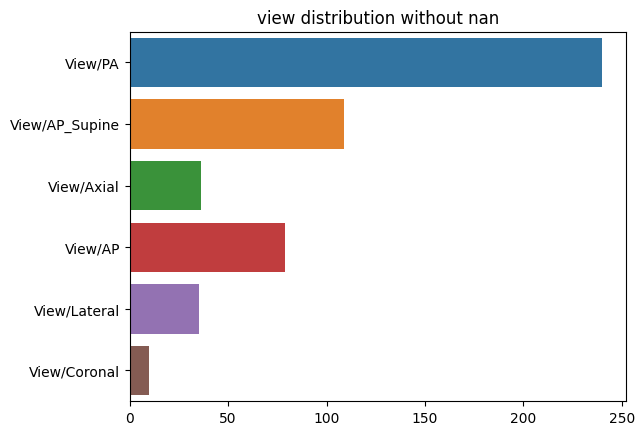

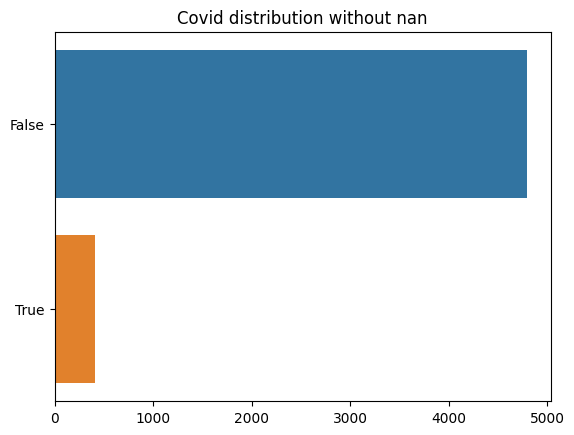

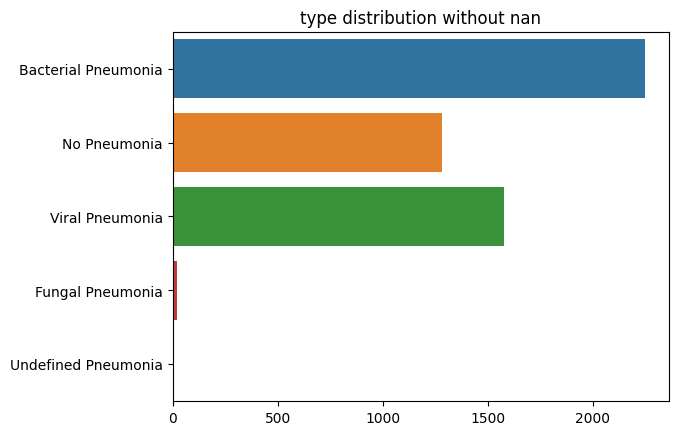

True

In [38]:
plot_distributions(train, ['view', "Covid", 'type'])

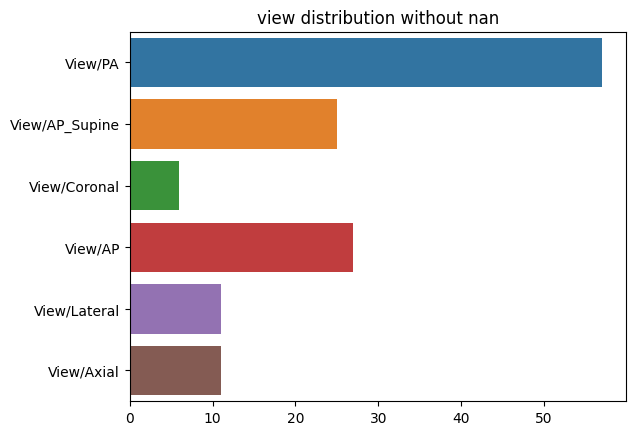

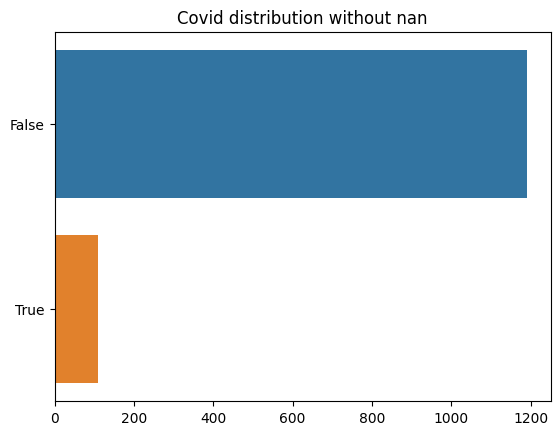

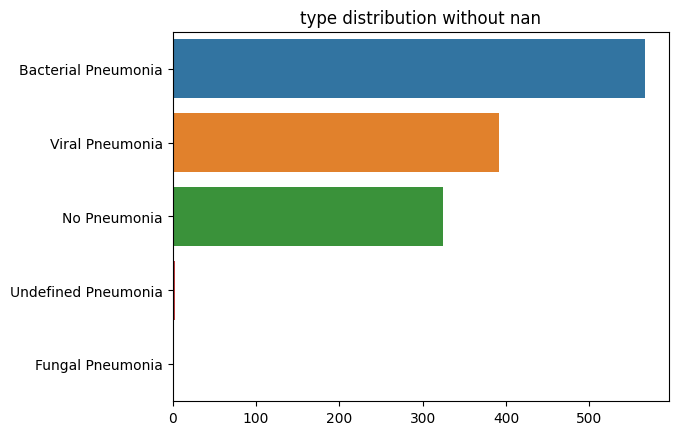

True

In [39]:
plot_distributions(test, ['view', "Covid", 'type'])

As you can see distribution is vastly different in this naive approach, the split must be better organized, by forcing similar distributions. But im going to look at test results anyway

### load image through csv

In [40]:
train.head(10)

,filename,type,ogfilename,lung1,lung2,view,Covid,width,height,json_filename
3001,00004211.jpeg,Bacterial Pneumonia,person1351_bacteria_3441.jpeg,"{'path': [{'x': 448, 'y': 57}, {'x': 447, 'y':...","{'path': [{'x': 648.0, 'y': 83}, {'x': 646.0, ...",NaN,False,1112.0,680.0,person1351_bacteria_3441.json
1279,00005903.jpeg,No Pneumonia,NORMAL2-IM-0123-0001.jpeg,"{'path': [{'x': 1129, 'y': 333.0}, {'x': 1129,...","{'path': [{'x': 874.0, 'y': 369}, {'x': 873, '...",NaN,False,2043.0,1217.0,NORMAL2-IM-0123-0001.json
3179,00001202.jpeg,Viral Pneumonia,person141_virus_287.jpeg,"{'path': [{'x': 671.0, 'y': 77}, {'x': 664, 'y...","{'path': [{'x': 937, 'y': 63.0}, {'x': 937, 'y...",NaN,False,1608.0,1168.0,person141_virus_287.json
3263,00001121.jpeg,Viral Pneumonia,person1455_virus_2488.jpeg,"{'path': [{'x': 338, 'y': 134}, {'x': 336, 'y'...","{'path': [{'x': 458, 'y': 129}, {'x': 458, 'y'...",NaN,False,904.0,608.0,person1455_virus_2488.json
4915,00002795.jpeg,Bacterial Pneumonia,person43_bacteria_213.jpeg,"{'path': [{'x': 524, 'y': 106}, {'x': 523, 'y'...","{'path': [{'x': 692, 'y': 83}, {'x': 692, 'y':...",NaN,False,1216.0,736.0,person43_bacteria_213.json
3132,00004026.jpeg,Bacterial Pneumonia,person1408_bacteria_3581.jpeg,"{'path': [{'x': 528, 'y': 53.0}, {'x': 497, 'y...","{'path': [{'x': 931, 'y': 30.0}, {'x': 931, 'y...",NaN,False,1576.0,1288.0,person1408_bacteria_3581.json
4264,00003188.jpeg,Bacterial Pneumonia,person281_bacteria_1325.jpeg,"{'path': [{'x': 369, 'y': 39.0}, {'x': 367, 'y...","{'path': [{'x': 568, 'y': 35}, {'x': 567, 'y':...",NaN,False,920.0,632.0,person281_bacteria_1325.json
1415,00005193.jpeg,No Pneumonia,NORMAL2-IM-0391-0001.jpeg,"{'path': [{'x': 636, 'y': 354.0}, {'x': 633, '...","{'path': [{'x': 815, 'y': 257}, {'x': 815, 'y'...",NaN,False,1582.0,1582.0,NORMAL2-IM-0391-0001.json
6172,00002157.jpeg,Bacterial Pneumonia,person874_bacteria_2797.jpeg,"{'path': [{'x': 449, 'y': 91}, {'x': 446.0, 'y...","{'path': [{'x': 589, 'y': 99}, {'x': 589, 'y':...",NaN,False,1016.0,744.0,person874_bacteria_2797.json
4856,00000804.jpeg,Viral Pneumonia,person421_virus_866.jpeg,"{'path': [{'x': 188.0, 'y': 5.0}, {'x': 187.0,...","{'path': [{'x': 246, 'y': 4}, {'x': 246, 'y': ...",NaN,False,452.0,180.0,person421_virus_866.json


In [41]:
alls= train['ogfilename']
samples= alls[:10]
samples

3001    person1351_bacteria_3441.jpeg
1279        NORMAL2-IM-0123-0001.jpeg
3179         person141_virus_287.jpeg
3263       person1455_virus_2488.jpeg
4915       person43_bacteria_213.jpeg
3132    person1408_bacteria_3581.jpeg
4264     person281_bacteria_1325.jpeg
1415        NORMAL2-IM-0391-0001.jpeg
6172     person874_bacteria_2797.jpeg
4856         person421_virus_866.jpeg
Name: ogfilename, dtype: object

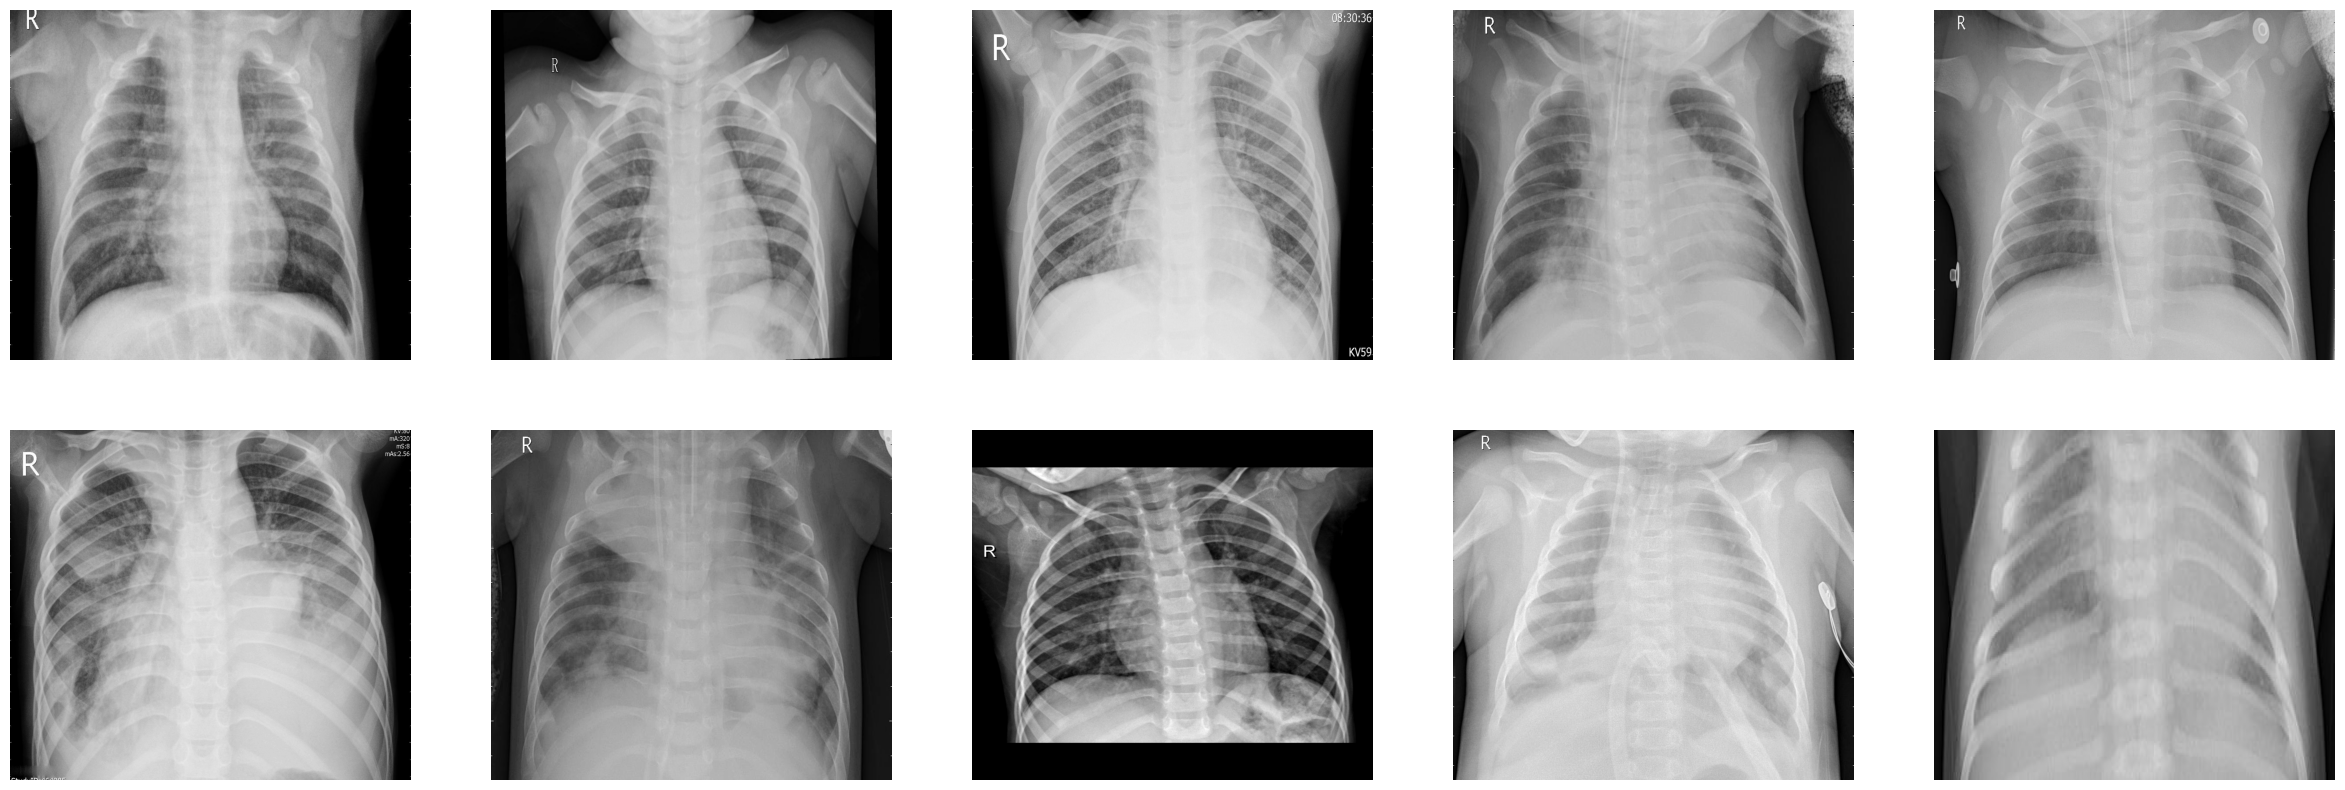

In [42]:
# Plot the first 10 images
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(imgLoc+samples.iloc[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

### Image processing
resize all images to 256 x256

In [43]:
# list(df['ogfilename'])

In [44]:
# Resizes images with remaining aspect ratio 2d greyscale. RGB seems to be the same everywhere but needs check up.
# if RGB isnt the same this code should be rewritten so that greyscale gets rgb columns. 
def resize(img_path, df):
    images = list(df['ogfilename'])
    resized = []
    for i in tqdm(images):
        img = imread(img_path + i)
        if len(img.shape) > 2:
#     if all chanels arent repeated
#             img = img[:, :, :3]
#     if channels are repeated
            img = img[:, :, 0]
        if img.shape[0] >= img.shape[1]:
            scale_percent = (256/ img.shape[0])
        else:
            scale_percent = (256/ img.shape[1])
        width = int(img.shape[1] * scale_percent)
        height = int(img.shape[0] * scale_percent)
        dim = (width, height)
        resize = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
        print("shape", resize.shape)
        resized.append(resize)
    return resized

In [45]:
kaas= (resize(imgLoc, df[:10]))

100%|████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 43.06it/s]

shape (247, 256)
shape (210, 256)
shape (238, 256)
shape (230, 256)
shape (208, 256)
shape (250, 256)
shape (221, 256)
shape (254, 256)
shape (215, 255)
shape (256, 204)


As can be seen images are not of same x,y so they need padding

In [46]:
def resize_with_pad(imgpath, df):
    desired_size = 256
    images = list(df['ogfilename'])
    resized = []
    for i in tqdm(images):
        img = imread(imgpath + i)
#         Remove unnecessary details from images
        if len(img.shape) > 2:
            img = img[:, :, 0]
#         Determine which side is bigger and therefore used as initial resize
        if img.shape[0] >= img.shape[1]:
            scale_percent = (desired_size/ img.shape[0])
        else:
            scale_percent = (desired_size/ img.shape[1])
#             Resize
        width = int(img.shape[1] * scale_percent)
        height = int(img.shape[0] * scale_percent)
        dim = (width, height)
        resize = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#         Determine how much border should be added
        delta_w = desired_size - width
        delta_h = desired_size - height
        top, bottom = delta_h//2, delta_h-(delta_h//2)
        left, right = delta_w//2, delta_w-(delta_w//2)
#         Color of border
        color = [0, 0, 0]
        new_im = cv2.copyMakeBorder(resize, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
        resized.append(new_im)
    return resized

In [47]:
# kaas= np.asarray(resize_with_pad(imgLoc, df))

In [48]:
# kaas.shape

### Model

In [49]:
# GPU check and version
print(tensorflow.config.list_physical_devices("GPU"))

print("________________________________________________")

print(tensorflow.test.is_gpu_available(cuda_only = False, min_cuda_compute_capability = None))

print("________________________________________________")

print("Current tensorflow version == {}".format(tensorflow. __version__))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
________________________________________________
True
________________________________________________
Current tensorflow version == 2.10.0


In [50]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [51]:
x_train = np.asarray(resize_with_pad(imgLoc, train))
y_train = train["Covid"]

100%|████████████████████████████████████████████████████████████| 5203/5203 [02:32<00:00, 34.10it/s]


In [52]:
y_train = keras.utils.to_categorical(y_train, 2)

In [53]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [54]:
# x_train_new = np.reshape(x_train, (5203,65536))
# x_train_new = x_train_new.astype('float32')
# x_train_new = x_train_new/255


In [55]:
# # very basic model from MLHVL
# model = keras.Sequential()
# model.add(keras.layers.Dense(256, input_shape=(65536,)))
# model.add(keras.layers.Dense(2, activation='softmax'))

In [56]:
# model.summary()

In [57]:
# test = train[train["Covid"]== False]
# test2 = train[train["Covid"]== True]
# print(len(test))
# print(len(test2))

In [58]:
# model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics='accuracy')
# model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),metrics='accuracy')

In [59]:
# history = model.fit(x_train_new, y_train, batch_size=40,
# epochs=20, verbose=1, validation_split=0.2)

### So one layer models does nothing, not really a shocker

In [60]:
x_train = x_train.reshape(-1, 256,256, 1)
x_train = x_train.astype('float32')
x_train = x_train/255

print("d", x_train.shape)

d (5203, 256, 256, 1)


In [61]:
# dropout deep conv from MLHVL
model2 = keras.Sequential()
model2.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3),
activation="relu", input_shape=(256, 256, 1)))
7
model2.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3),
activation="relu"))
model2.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model2.add(keras.layers.Dropout(rate=0.25))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(128, activation="relu"))
model2.add(keras.layers.Dropout(rate=0.5))
model2.add(keras.layers.Dense(2, activation="softmax"))
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(learning_rate=1),
metrics='accuracy')

In [62]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 126, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 flatten (Flatten)           (None, 1016064)           0         
                                                                 
 dense (Dense)               (None, 128)               130056320 
                                                        

In [63]:
history = model2.fit(x_train, y_train, batch_size=30,
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
139/139 [==============================] - 49s 339ms/step - loss: 0.4100 - accuracy: 0.9306 - val_loss: 0.1438 - val_accuracy: 0.9337
Epoch 2/6
139/139 [==============================] - 47s 337ms/step - loss: 0.1263 - accuracy: 0.9467 - val_loss: 0.1134 - val_accuracy: 0.9568
Epoch 3/6
139/139 [==============================] - 47s 339ms/step - loss: 0.1111 - accuracy: 0.9539 - val_loss: 0.1065 - val_accuracy: 0.9577
Epoch 4/6
139/139 [==============================] - 47s 341ms/step - loss: 0.0978 - accuracy: 0.9599 - val_loss: 0.0999 - val_accuracy: 0.9568
Epoch 5/6
139/139 [==============================] - 47s 339ms/step - loss: 0.0871 - accuracy: 0.9628 - val_loss: 0.1055 - val_accuracy: 0.9568
Epoch 6/6
139/139 [==============================] - 47s 339ms/step - loss: 0.0777 - accuracy: 0.9649 - val_loss: 0.0847 - val_accuracy: 0.9606


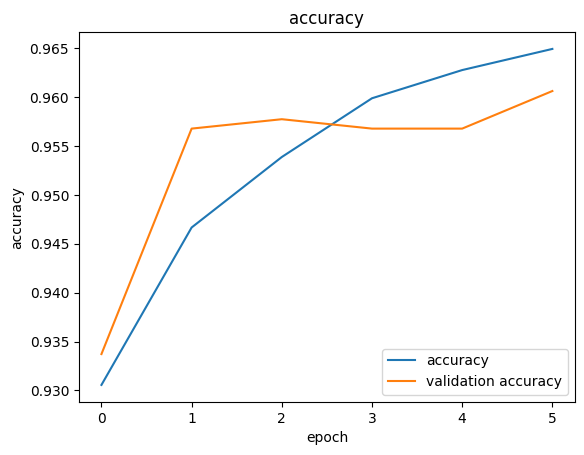

In [66]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.title("accuracy")
plt.show()

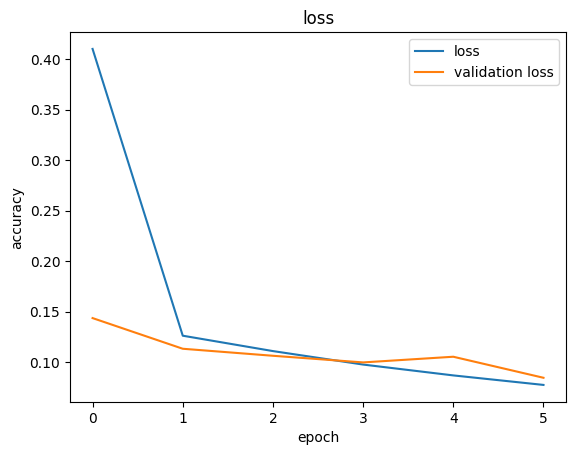

In [67]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.title("loss")
plt.show()

#### 